1-	Do higher and lower temperatures have an impact on energy consumption? 

In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path
import hvplot.pandas
import requests
import json

In [2]:
#import files and read the data
main_data_path = Path("Resources/projectdata.csv")
main_data = pd.read_csv(main_data_path)
main_data

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
0,Algeria,19.455220,0.16,75.85,0.00,0.84,1.095319,16259.0530,1.712500e+05,28.033886,1.659626,43451666
1,Angola,25.890110,54.69,4.38,0.00,11.02,71.558440,3667.4238,2.521000e+04,-11.202692,17.873887,33428485
2,Antigua and Barbuda,26.725275,0.91,0.33,0.00,0.01,2.941176,33027.5160,5.200000e+02,17.060816,-61.796428,92664
3,Argentina,17.916484,10.74,90.56,7.97,34.63,31.991589,20725.1680,1.681000e+05,-38.416097,-63.616672,45036032
4,Austria,14.144780,33.77,16.22,0.00,54.64,77.109795,48314.2580,6.477000e+04,47.516231,14.550072,8907777
...,...,...,...,...,...,...,...,...,...,...,...,...
98,United Arab Emirates,28.663736,0.67,125.85,0.00,3.80,2.930968,134878.3900,1.888600e+05,23.424076,53.847818,9287289
99,United Kingdom,10.468681,12.24,144.99,56.18,120.48,54.923054,32893.7600,3.489200e+05,55.378051,-3.435973,67059474
100,United States,15.260440,10.42,2588.21,809.41,760.76,37.759180,79489.0160,4.817720e+06,37.090240,-95.712891,335942003
101,Uruguay,16.787637,60.76,1.89,0.00,14.16,88.224304,19985.0100,6.490000e+03,-32.522779,-55.765835,3429086


In [3]:
#top 10 coldest countries
main_data_cold = main_data.sort_values("Average Temp", ascending=True)
main_data_cold.head(10)

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
39,Iceland,5.715385,81.07,0.00,0.00,19.12,100.000000,175527.730,1639.999986,64.963051,-19.020835,366669
14,Canada,5.912088,22.11,110.65,95.47,421.80,82.378334,107980.760,580210.022000,56.130366,-106.346771,37888705
28,Finland,7.070604,45.76,12.63,23.87,31.88,81.529690,59219.418,40709.999080,61.924110,25.748151,5529468
26,Estonia,7.326648,31.29,5.47,0.00,2.14,28.120895,47295.336,10180.000310,58.595272,25.013607,1329444
67,Norway,7.402473,62.37,2.76,0.00,131.07,97.937690,96392.500,35950.000760,60.472024,8.468946,5379839
90,Sweden,7.812948,52.88,3.35,66.13,98.94,98.010925,63283.470,35000.000000,60.128161,18.643501,10368969
49,Latvia,8.948485,41.52,3.25,0.00,3.19,49.534160,23394.700,7570.000172,56.879635,24.603189,1897052
52,Lithuania,9.236264,33.53,0.67,0.00,2.47,78.662415,24873.117,11729.999540,55.169438,23.881275,2820267
9,Belarus,9.339286,7.83,36.74,0.00,0.94,2.494692,31923.436,57669.998170,53.709807,27.953389,9633740
42,Ireland,9.892857,12.34,18.92,0.00,11.80,38.411460,38270.875,35750.000000,53.412910,-8.243890,4946119


In [4]:
#top 10 hottest countries
main_data_hot = main_data.sort_values("Average Temp", ascending=False)
main_data_hot.head(10)

,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population
89,Sudan,32.239286,62.23,5.98,0.0,10.33,63.335380,2459.36280,20620.000840,12.862807,30.217636,44440486
66,Niger,31.365934,80.83,0.56,0.0,0.05,8.196721,468.48480,2150.000095,17.607789,8.081666,24333639
22,Djibouti,30.737912,27.92,0.06,0.0,0.00,0.000000,2848.78660,419.999987,11.825138,42.590275,1090156
12,Burkina Faso,30.486538,64.85,1.51,0.0,0.21,12.209302,946.95734,5000.000000,12.238333,-1.561593,21522626
16,Chad,30.223626,77.79,0.30,0.0,0.01,3.225807,458.18085,2250.000000,15.454166,18.732207,16644701
55,Mali,29.987912,76.64,2.15,0.0,1.17,35.240963,1231.71510,5829.999924,17.570692,-3.996166,21224040
91,Thailand,29.088736,23.96,162.59,0.0,28.02,14.700173,20792.38500,267089.996300,15.870032,100.992541,71475664
83,Singapore,28.921154,0.84,50.96,0.0,0.78,1.507538,158657.89000,47380.001070,1.352083,103.819836,5909869
54,Maldives,28.823901,1.11,0.61,0.0,0.03,4.687500,18567.89600,2109.999895,3.202778,73.220680,514438
13,Cambodia,28.714011,53.36,3.94,0.0,4.51,53.372787,4069.46070,16180.000310,12.565679,104.990963,16396860


The r-squared is: 0.07426043111699936


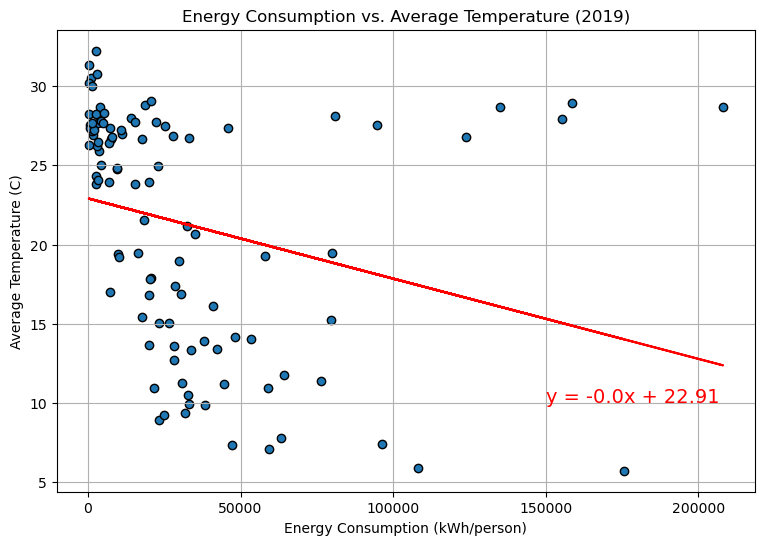

In [5]:
#scatter plot showing the correlation between temp and primary energy consumption
energy_consumption = main_data["Primary energy consumption per capita (kWh/person)"]
temperature = main_data["Average Temp"]

plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (150000, 10), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [6]:
#create two data frames (high and low temperatures)

high_temps = main_data.loc[main_data['Average Temp'] >= 20]
low_temps = main_data.loc[main_data['Average Temp'] < 20]


The r-squared is: 0.009008899533743002


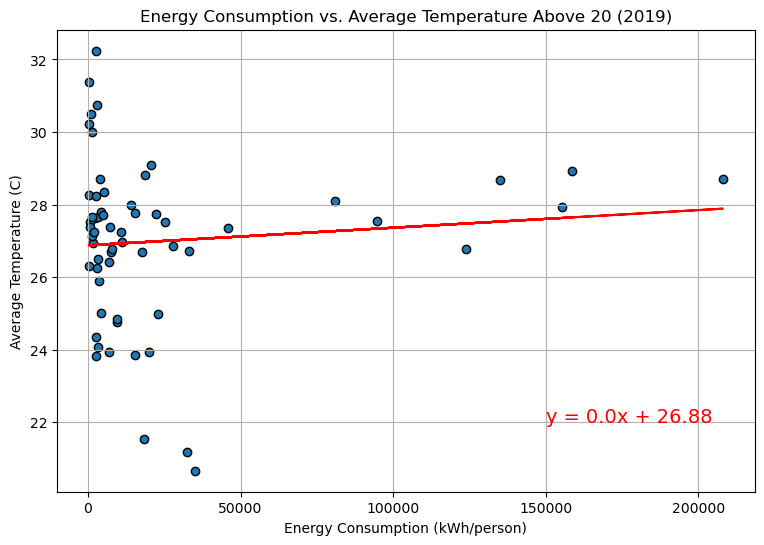

In [7]:
#scatter plot showing the correlation between temp and primary energy consumption in high temp 
energy_consumption = high_temps["Primary energy consumption per capita (kWh/person)"]
temperature = high_temps["Average Temp"]

plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature Above 20 (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (150000, 22), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

The r-squared is: 0.25959210082336154


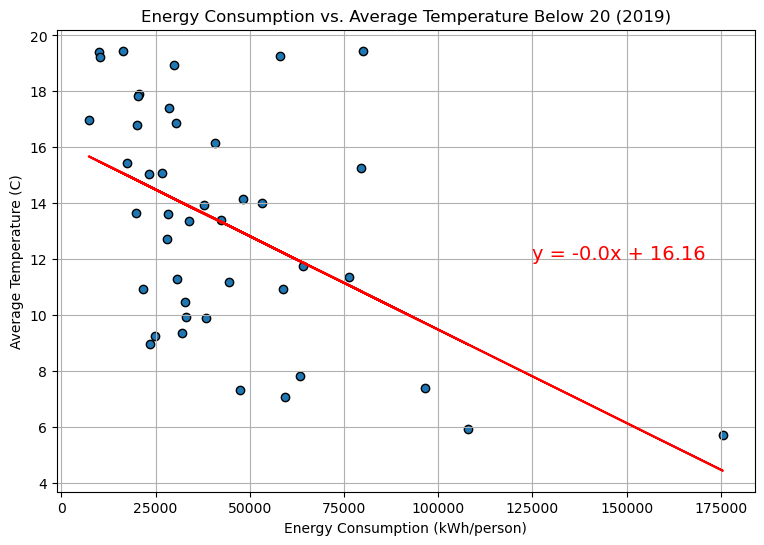

In [8]:
#scatter plot showing the correlation between temp and primary energy consumption in low temp 
energy_consumption = low_temps["Primary energy consumption per capita (kWh/person)"]
temperature = low_temps["Average Temp"]

plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature Below 20 (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 12), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()